In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_column",None)
pd.set_option("display.max_row",None)

In [2]:
data=pd.read_csv("train (1).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.duplicated().sum()


0

In [5]:
data['Cabin'].dtype

dtype('O')

In [6]:
def check_null(df):
    null_count = df.isnull().sum()
    null_percent = (df.isnull().mean() * 100).round(2)
    result = pd.DataFrame({
        'null_count': null_count,
        'null_percent': null_percent
    })
    return result


In [7]:
check_null(data)

,null_count,null_percent
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [8]:
details = check_null(data)
print(details)

             null_count  null_percent
PassengerId           0          0.00
Survived              0          0.00
Pclass                0          0.00
Name                  0          0.00
Sex                   0          0.00
Age                 177         19.87
SibSp                 0          0.00
Parch                 0          0.00
Ticket                0          0.00
Fare                  0          0.00
Cabin               687         77.10
Embarked              2          0.22


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
 data['Survived'].mean() * 100

38.38383838383838

In [11]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
d=pd.read_csv("test.csv")

In [15]:
d

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
d.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
d.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
d['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
d['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [21]:
d['Age'].isnull().sum()

86

In [22]:
survival_by_sex =data.groupby('Sex')['Survived'].mean().reset_index()

In [23]:
survival_by_sex['Survival Rate (%)'] = survival_by_sex['Survived'] * 100

In [24]:
survival_by_sex = survival_by_sex[['Sex', 'Survival Rate (%)']]

In [25]:
survival_by_sex

,Sex,Survival Rate (%)
0,female,74.203822
1,male,18.890815


In [26]:
d['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
d.shape

(418, 11)

In [28]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
data[data['Ticket']=="CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


# univarient

In [30]:
c=pd.concat([data,d])

In [31]:
c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# FAMILY SIZE

In [32]:
c["family_size"]=c["SibSp"]+c['Parch']+1

In [33]:
c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,2


In [34]:
c['family_group']=np.where(c['family_size']==1,"Alone"
                         ,np.where(c['family_size']==2,"small", 
                         np.where(c['family_size']<=4 ,"Medium", 
                         np.where(c['family_size']>=5,"large",c['family_size']))))

In [35]:
c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone


In [36]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1046 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1308 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1307 non-null   object 
 12  family_size   1309 non-null   int64  
 13  family_group  1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [37]:
c['title']=c['Name'].str.split(", ").str[1].str.split(".").str[0]

In [38]:
c['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, dtype: int64

# Univarient analysis on numerical columns

In [39]:
c["Age"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 417
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
1046 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [40]:
print("mean: ",c["Age"].mean())
print("Median: ",c["Age"].median())
print("mode: ",c["Age"].mode()[0])
print("standerd daviation: ",c["Age"].std())
print("varience:  ",c["Age"].var())
print("minimum: ",c["Age"].min())
print("maximum: ",c["Age"].max())
print("count: ",c["Age"].count())
print("shape: ",c["Age"].shape)



mean:  29.881137667304014
Median:  28.0
mode:  24.0
standerd daviation:  14.413493211271334
varience:   207.74878655136482
minimum:  0.17
maximum:  80.0
count:  1046
shape:  (1309,)


In [41]:
#handle missing in age 

In [42]:
c["Age"].isnull().sum()                       ##checking null value 

263

In [43]:
bins = [0.00, 12.0, 18.0, 55.0, 80.0]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
c['Age_Group'] = pd.cut(
    c['Age'],
    bins=bins,
    labels=labels,                                      ##creted age group
    right=True,
    include_lowest=True
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


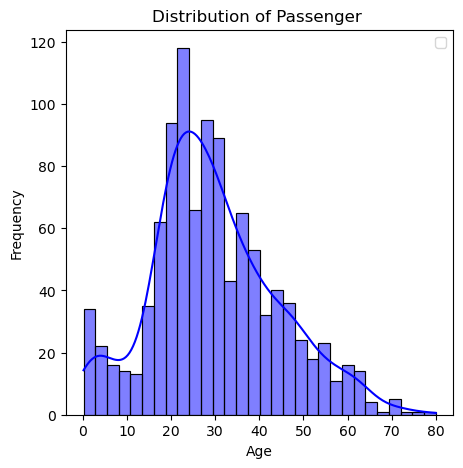

In [44]:
plt.figure(figsize=(5, 5))
sns.histplot(c['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Passenger ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Observation:-20 TO 30 year people are the most

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

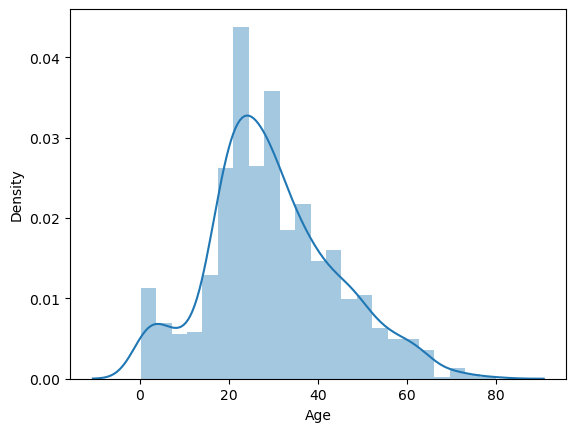

In [45]:
sns.distplot(c['Age'])

In [46]:
c['Age'].skew()                        ##The distribution is somewhat close to a normal (symmetric) bell curve.

0.40767455974362266

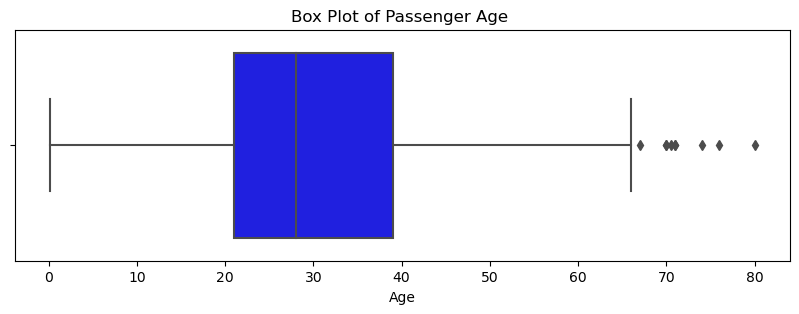

In [47]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=c['Age'], color='blue')
plt.title('Box Plot of Passenger Age ')
plt.xlabel('Age')                                                            #to check outliers  

plt.show() 

Pie Chart for age group

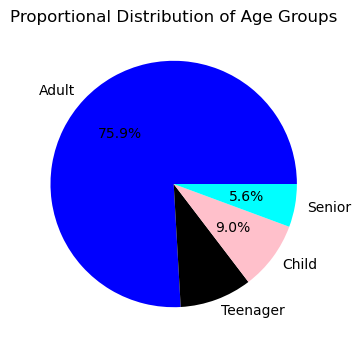

In [48]:
age_group_counts = c['Age_Group'].value_counts()
ordered_labels = ['Adult', 'Teenager', 'Child', 'Senior']
ordered_counts = age_group_counts.reindex(ordered_labels)

plt.figure(figsize=(4, 4))
plt.pie(
    ordered_counts, 
    labels=ordered_counts.index, 
    autopct='%1.1f%%',                                 # Shows percentage with one decimal place
    colors={"black","pink","cyan","blue"},    
)
plt.title('Proportional Distribution of Age Groups')
plt.ylabel('')
plt.show()

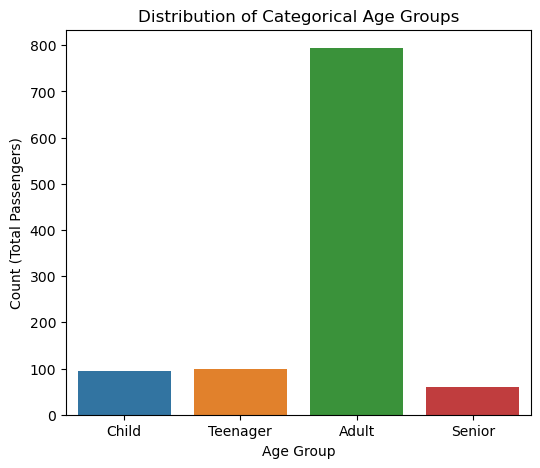

In [56]:

labels = ['Child', 'Teenager', 'Adult', 'Senior']
plt.figure(figsize=(6, 5))
sns.countplot(x='Age_Group', data=c,order=labels)
plt.title('Distribution of Categorical Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count (Total Passengers)')
plt.show()

In [57]:
c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group,title,Age_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small,Mr,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,Mrs,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,Miss,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small,Mrs,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,Mr,Adult


# fare

In [72]:
#null value 
c['Fare'].isnull().sum()  

1

In [73]:
c['Fare'].isnull().sum()/len(c['Fare'])*100

0.07639419404125286

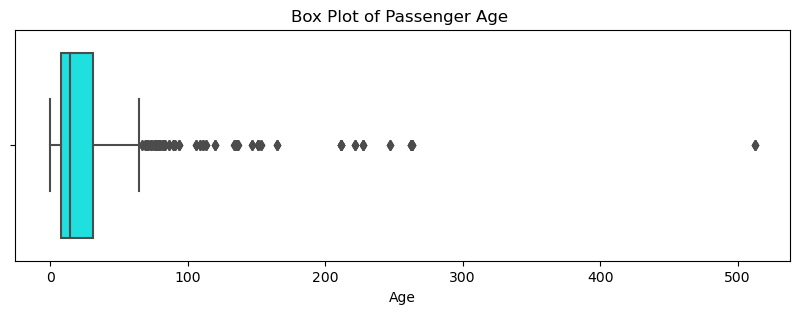

In [54]:
 #to check outliers
plt.figure(figsize=(10, 3))
sns.boxplot(x=c['Fare'], color='cyan')
plt.title('Box Plot of Passenger Age ')
plt.xlabel('Age')                                                             

plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


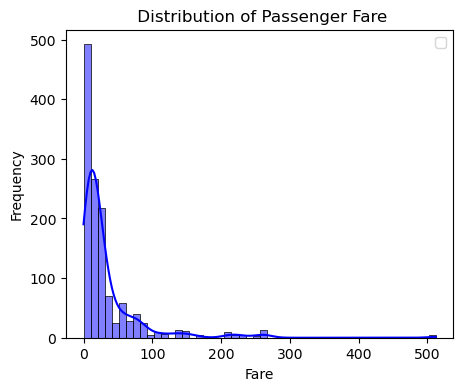

In [51]:

#check distribution
plt.figure(figsize=(5, 4))
sns.histplot(c['Fare'], bins=50, kde=True, color='blue')
plt.title(' Distribution of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [53]:
c['Fare'].skew()


4.367709134122922

In [58]:
c['Fare'].describe()  #statistical discription

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

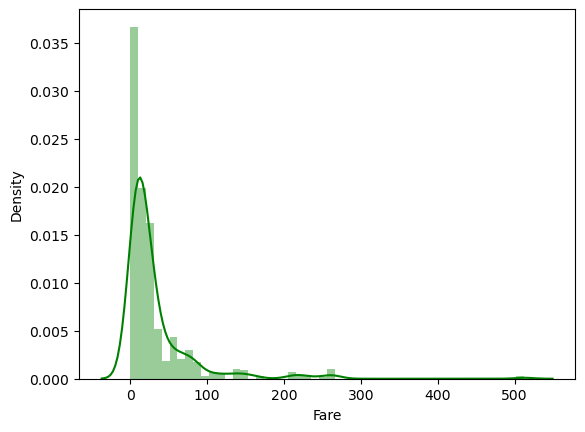

In [65]:
sns.distplot(c['Fare'], color="green")

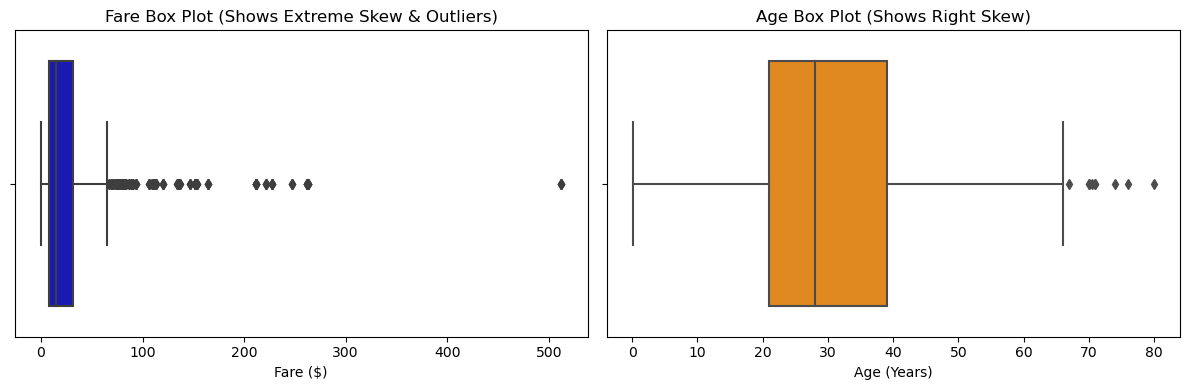

In [67]:
# --- Extra Plots: Box Plots for Numerical Data (Separate Window) ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=c['Fare'], color='mediumblue')
plt.title('Fare Box Plot (Shows Extreme Skew & Outliers)')
plt.xlabel('Fare ($)')

plt.subplot(1, 2, 2)
sns.boxplot(x=c['Age'], color='darkorange')
plt.title('Age Box Plot (Shows Right Skew)')
plt.xlabel('Age (Years)')
plt.tight_layout()
plt.show()

In [ ]:
# The Fare column exhibits a highly positive (right) skewness ($\approx 4.36), 
# confirming that the distribution is not normal. The majority of passengers are concentrated 
# at the lower end of the fare scale, with the median fare being $14.45. However, the mean fare 
# ($33.28) is significantly higher due to the presence of high-value outliers (maximum fare $512.33).
# These outliers, clearly visible in the Box Plot, 


# Catagorical Survived

In [ ]:
c['Survived'].isnull().sum()

In [ ]:
per=c['Survived'].isnull().sum()/len(c['Survived'])*100

In [ ]:
per

In [ ]:
c["Survived"].info()

In [ ]:
c["Survived"].value_counts()

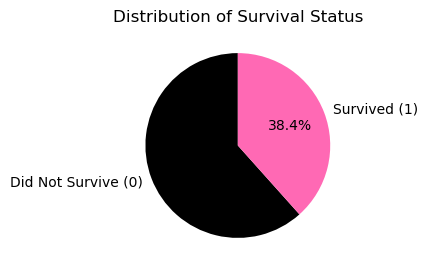

In [74]:

plt.figure(figsize=(3, 3))
plt.pie(
    c["Survived"].value_counts(),               # <-- Counts (Numbers)
    labels = ['Did Not Survive (0)', 'Survived (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors={"black","hotpink"},
#     wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Survival Status')
plt.ylabel('')
plt.show()

In [75]:
c["Survived"].skew()         # The positive skewness confirms the concentration of passengers
                              # at younger ages, with a long tail of older individuals.

0.4785234382949897

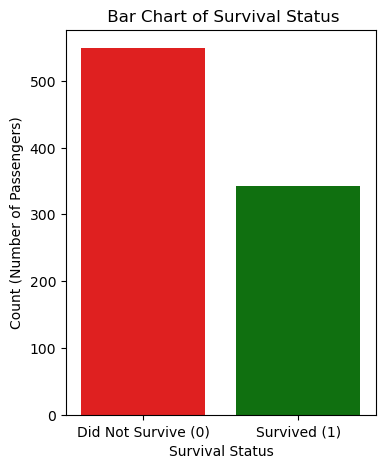

In [89]:
d= c['Survived'].value_counts()
e = d.reset_index()
e.columns = ['Survived_Status', 'Count'] # Using Survived_Status
x_labels = ['Did Not Survive (0)', 'Survived (1)']
colors = ['red', 'green']
plt.figure(figsize=(4, 5))
sns.barplot(x='Survived_Status', y='Count', data=e, palette=colors)

plt.title(' Bar Chart of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Count (Number of Passengers)')
plt.xticks(ticks=[0, 1], labels=x_labels)

plt.show()

Pclass

In [79]:
c['Pclass'].mode()[0]

3

In [80]:
c['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [82]:
c['Pclass'].isnull().sum()

0

In [83]:
c['Pclass'].skew()

-0.5986471102804279

In [85]:
c['Pclass'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 417
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
1309 non-null   int64
dtypes: int64(1)
memory usage: 20.5 KB


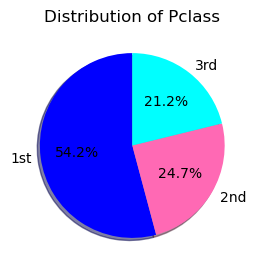

In [95]:
# plt.figure(figsize=(3, 3))
# plt.pie(
#     c["Pclass"].value_counts(),               # <-- Counts (Numbers)
#     labels = ['1st', '2nd','3rd'],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors={"blue","hotpink","cyan"},
#     shadow=True
# #     wedgeprops={'edgecolor': 'black'}
# )
# plt.title('Distribution of Pclass')
# plt.ylabel('')
# plt.show()

In [76]:
c.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group,title,Age_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,small,Mr,Adult


GENDER

In [94]:
c['Sex'].mode()[0]  #MODE

'male'

In [98]:
count=c['Sex'].value_counts()
count

male      843
female    466
Name: Sex, dtype: int64

In [100]:
c['Sex'].isnull().sum()

0

In [101]:
c['Sex'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 417
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 20.5+ KB


In [102]:
# def bar_chart(feature):
#     survived = data[data['Survived']==1][feature].value_counts()
#     dead = data[data['Survived']==0][feature].value_counts()
#     df = pd.DataFrame([survived,dead])
#     df.index = ['Survived','Dead']
#     df.plot(kind='bar',stacked=True, figsize=(10,5))

In [104]:
# bar_chart('Sex')

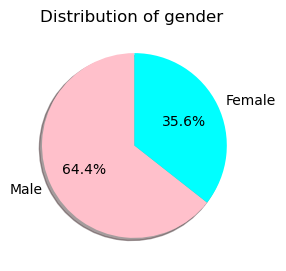

In [112]:
plt.figure(figsize=(3, 3))
plt.pie(
    c["Sex"].value_counts(),               # <-- Counts (Numbers)
    labels = ['Male','Female'],
    autopct='%1.1f%%',
    startangle=90,
    colors={"cyan","pink"},
    shadow=True
#     wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of gender ')

plt.show()

In [114]:
c["Sex"].value_counts().skew()

nan

In [115]:
c.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_group,title,Age_Group
403,404,0.0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.85,NaN,S,2,small,Mr,Adult
